# Image_extraction_for_detection

In [1]:
import numpy as np # linear algebra and array

import pandas as pd # data processing, JSON file I/O
import urllib
import requests # data from url 
import json
import random

from PIL import Image
import matplotlib.pyplot as plt # plotting the image 
import cv2

import pickle # Save the data locally
import io 

In [2]:
# Read the data 
data = pd.read_json('Indian_Number_plates.json', lines=True)
pd.set_option('display.max_colwidth', -1)

# Data Preprocessing
# Delete the empty column
del data['extras']

# Extract the Box of number plate via points provided
data['points'] = data.apply(lambda row: row['annotation'][0]['points'], axis=1)

# Data cleaning
# And drop the rest of the annotation info
del data['annotation']

In [16]:
Images = []
Plates = []

def downloadTraining(df):

    for index, row in df.iterrows():

        # Get the image from the URL
        # URL is the first "content" in a line
        resp = urllib.request.urlopen(row[0]) 
        im = np.array(Image.open(resp))

        # We append the image to the training input array
        Images.append(im)  

        # Points of Number plate Boundary 
        # Multiplying given points with height and width to get the actual co-ordinates
        x_point_top = row[1][0]['x']*im.shape[1]
        y_point_top = row[1][0]['y']*im.shape[0]
        x_point_bot = row[1][1]['x']*im.shape[1]
        y_point_bot = row[1][1]['y']*im.shape[0]

        # Cut the plate from the image and keep it seperately
        completeImage = Image.fromarray(im)
        plateImage = completeImage.crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
        Plates.append(np.array(plateImage))

downloadTraining(data)

In [4]:
# Using pickle to store the python list locally so that extracting images from url is not required again
# Python lists of car and number plate saved in list
print("Data Loading...Wait")
with open('Images_array_train', 'wb') as f:
    pickle.dump(Images, f)
with open('Plates_array_train', 'wb') as f:
    pickle.dump(Plates, f)  

print("Data Saved")

Data Loading...Wait
Data Saved


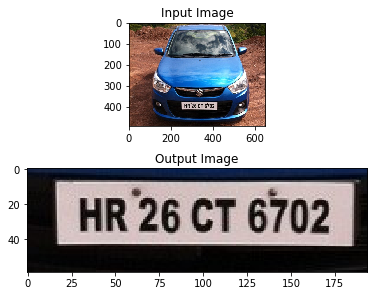

In [15]:
# The Locally saved python list can be accesed easily for images
with open('Images_array_train', 'rb') as f:
    mylist1 = pickle.load(f)

with open('Plates_array_train', 'rb') as f:
    mylist2 = pickle.load(f)

# Create figure and axes
fig, ax = plt.subplots(2, 1, constrained_layout=True)

# Set title
ax[0].set_title('Input Image')
ax[1].set_title('Output Image')

# Display the images
# Car
tt=random.randint(0, 235)
ax[0].imshow(mylist1[tt])
# Number plate
ax[1].imshow(mylist2[tt])

plt.show()